In [ ]:
path = data/aclImdb/

In [1]:
import os
import random
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Download NLTK resources (only needs to be done once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Load the datasets
def load_dataset(path):
    dataset = []
    labels = []
    for label in ['pos', 'neg']:
        folder = os.path.join(path, label)
        files = os.listdir(folder)
        for file in files:
            with open(os.path.join(folder, file), 'r', encoding='utf-8') as f:
                review = f.read()
                dataset.append(review)
                labels.append(label)
    return dataset, labels

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
# Shuffle the data
def shuffle_data(dataset, labels):
    combined = list(zip(dataset, labels))
    random.shuffle(combined)
    dataset_shuffled, labels_shuffled = zip(*combined)
    return list(dataset_shuffled), list(labels_shuffled)

# Preprocessing functions
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text.lower())
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return tokens

In [4]:
# Perform exploratory data analysis
def analyze_data(dataset, labels):
    # Distribution of sentiments/emotions
    sentiment_counts = np.unique(labels, return_counts=True)
    sentiments = sentiment_counts[0]
    counts = sentiment_counts[1]
    plt.bar(sentiments, counts)
    plt.xlabel('Sentiment/Emotion')
    plt.ylabel('Count')
    plt.title('Distribution of Sentiments/Emotions')
    plt.show()
    
    # Number of unique words
    unique_words = set()
    for review in dataset:
        tokens = preprocess_text(review)
        unique_words.update(tokens)
    num_unique_words = len(unique_words)
    
    # Average review length
    review_lengths = [len(preprocess_text(review)) for review in dataset]
    avg_review_length = np.mean(review_lengths)
    
    # Print the results
    print(f"Number of unique words: {num_unique_words}")
    print(f"Average review length: {avg_review_length:.2f} words")
    

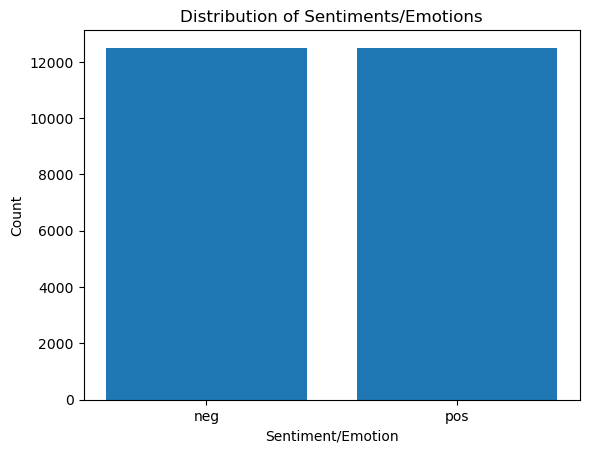

Number of unique words: 87086
Average review length: 171.15 words
[('this', 'DT'), ('is', 'VBZ'), ('a', 'DT'), ('confused', 'JJ'), ('and', 'CC'), ('incoherent', 'JJ'), ('mess', 'NN'), ('of', 'IN'), ('interminable', 'JJ'), ('scenes', 'NNS'), ('of', 'IN'), ('boring', 'VBG'), ('dialogues', 'NNS'), ('and', 'CC'), ('monologues', 'NNS'), ('.', '.'), ('that', 'WDT'), ('is', 'VBZ'), ('no', 'DT'), ('exaggeration', 'NN'), (':', ':'), ('you', 'PRP'), ('have', 'VBP'), ('to', 'TO'), ('make', 'VB'), ('a', 'DT'), ('tremendous', 'JJ'), ('effort', 'NN'), ('to', 'TO'), ('even', 'RB'), ('try', 'VB'), ('to', 'TO'), ('become', 'VB'), ('involved', 'JJ'), ('with', 'IN'), ('it.', 'JJ'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'NNP'), ('<', 'NNP'), ('br', 'NN'), ('/', 'NNP'), ('>', 'NNP'), ('i', 'NN'), ('sincerely', 'RB'), ('thought', 'VBN'), ('fassbinder', 'NN'), ('would', 'MD'), ('make', 'VB'), ('something', 'NN'), ('interesting', 'VBG'), ('in', 'IN'), ('order', 'NN'), ('to', 'TO'), ('tell', 'VB'), (

In [5]:
# Perform POS tagging
def perform_pos_tagging(text):
    tokens = word_tokenize(text.lower())
    tagged_tokens = pos_tag(tokens)
    return tagged_tokens

# Set the path to the dataset folder
dataset_path = 'data/aclImdb'

# Load the dataset
train_dataset, train_labels = load_dataset(os.path.join(dataset_path, 'train'))
test_dataset, test_labels = load_dataset(os.path.join(dataset_path, 'test'))

# Shuffle the training and testing data
train_dataset_shuffled, train_labels_shuffled = shuffle_data(train_dataset, train_labels)
test_dataset_shuffled, test_labels_shuffled = shuffle_data(test_dataset, test_labels)

# Preprocess the text data
preprocessed_train_dataset = [preprocess_text(review) for review in train_dataset_shuffled]
preprocessed_test_dataset = [preprocess_text(review) for review in test_dataset_shuffled]

# Perform exploratory data analysis
analyze_data(train_dataset_shuffled, train_labels_shuffled)

# Perform POS tagging
tagged_tokens = perform_pos_tagging(train_dataset_shuffled[0])
print(tagged_tokens)


## Q2 -  Sentiment Analysis with Bag of Words (BoW) and TF-IDF

In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Convert preprocessed data into BoW representation
vectorizer = CountVectorizer()
X_train_bow = vectorizer.fit_transform([' '.join(review) for review in preprocessed_train_dataset])
X_test_bow = vectorizer.transform([' '.join(review) for review in preprocessed_test_dataset])

# Convert preprocessed data into TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform([' '.join(review) for review in preprocessed_train_dataset])
X_test_tfidf = tfidf_vectorizer.transform([' '.join(review) for review in preprocessed_test_dataset])

# Divide data into training and test sets
y_train = train_labels_shuffled
y_test = test_labels_shuffled

In [7]:
# Train logistic regression classifier on BoW representation
lr_bow = LogisticRegression()
lr_bow.fit(X_train_bow, y_train)

# Predict on the test set using BoW representation
y_pred_bow = lr_bow.predict(X_test_bow)

# Calculate evaluation metrics for BoW representation
accuracy_bow = accuracy_score(y_test, y_pred_bow)
precision_bow = precision_score(y_test, y_pred_bow, pos_label='pos')
recall_bow = recall_score(y_test, y_pred_bow, pos_label='pos')
f1_score_bow = f1_score(y_test, y_pred_bow, pos_label='pos')

C:\Users\preet\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# Train logistic regression classifier on TF-IDF representation
lr_tfidf = LogisticRegression()
lr_tfidf.fit(X_train_tfidf, y_train)

# Predict on the test set using TF-IDF representation
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)

# Calculate evaluation metrics for TF-IDF representation
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, pos_label='pos')
recall_tfidf = recall_score(y_test, y_pred_tfidf, pos_label='pos')
f1_score_tfidf = f1_score(y_test, y_pred_tfidf, pos_label='pos')

# Print the evaluation metrics
print("Evaluation Metrics for Bag of Words (BoW):")
print("Accuracy:", accuracy_bow)
print("Precision:", precision_bow)
print("Recall:", recall_bow)
print("F1-score:", f1_score_bow)
print()
print("Evaluation Metrics for TF-IDF:")
print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1-score:", f1_score_tfidf)


Evaluation Metrics for Bag of Words (BoW):
Accuracy: 0.85308
Precision: 0.8599037755850933
Recall: 0.8436
F1-score: 0.851673868271211

Evaluation Metrics for TF-IDF:
Accuracy: 0.87756
Precision: 0.8778925454399872
Recall: 0.87712
F1-score: 0.8775061026851814


## Q3: Sentiment Analysis with Word Embeddings

In [13]:
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression

# Train Word2Vec model on the preprocessed text data
w2v_model = Word2Vec(sentences=preprocessed_train_dataset, vector_size=100, window=5, min_count=1)

# Convert the preprocessed movie reviews into Word2Vec vectors
X_train_w2v = [np.mean([w2v_model.wv[word] for word in review if word in w2v_model.wv], axis=0) for review in preprocessed_train_dataset]
X_test_w2v = [np.mean([w2v_model.wv[word] for word in review if word in w2v_model.wv], axis=0) for review in preprocessed_test_dataset]

# Train logistic regression classifier on Word2Vec vectors
lr_w2v = LogisticRegression(max_iter=1000)
lr_w2v.fit(X_train_w2v, y_train)

# Predict on the test set using Word2Vec vectors
y_pred_w2v = lr_w2v.predict(X_test_w2v)

# Calculate evaluation metrics for Word2Vec model
accuracy_w2v = accuracy_score(y_test, y_pred_w2v)
precision_w2v = precision_score(y_test, y_pred_w2v, pos_label='pos')
recall_w2v = recall_score(y_test, y_pred_w2v, pos_label='pos')
f1_score_w2v = f1_score(y_test, y_pred_w2v, pos_label='pos')

# Print the evaluation metrics
print("Evaluation Metrics for Word2Vec:")
print("Accuracy:", accuracy_w2v)
print("Precision:", precision_w2v)
print("Recall:", recall_w2v)
print("F1-score:", f1_score_w2v)


Evaluation Metrics for Word2Vec:
Accuracy: 0.83844
Precision: 0.8381964985210648
Recall: 0.8388
F1-score: 0.838498140669359


## Q4: Emotion Classification

In [6]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the training dataset
train_dataset_path = 'data/SemEval2018/English/E-c/2018-E-c-En-train.txt'
train_data = pd.read_csv(train_dataset_path, sep='\t', encoding='utf-8')

# Load the testing dataset
test_dataset_path = 'data/SemEval2018/English/E-c/2018-E-c-En-test-gold.txt'
test_data = pd.read_csv(test_dataset_path, sep='\t', encoding='utf-8')

In [ ]:
# Check the summary statistics of the DataFrame
print(train_data.describe())  # Summary statistics of the training dataset
print(test_data.describe())  # Summary statistics of the testing dataset

# Check the distribution of emotions in the training dataset
emotion_counts_train = train_data.iloc[:, 2:].sum().sort_values(ascending=False)
print(emotion_counts_train)

# Calculate the number of unique words in the Tweet column
unique_words_train = train_data['Tweet'].str.split().apply(set).apply(len).sum()
print("Number of unique words in training dataset:", unique_words_train)

# Calculate the average tweet length in the training dataset
average_length_train = train_data['Tweet'].str.split().apply(len).mean()
print("Average tweet length in training dataset:", average_length_train)

# Visualize the distribution of emotions in the training dataset
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts_train.index, y=emotion_counts_train.values)
plt.title('Distribution of Emotions in Training Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()

# Calculate the number of unique words in the Tweet column in the testing dataset
unique_words_test = test_data['Tweet'].str.split().apply(set).apply(len).sum()
print("Number of unique words in testing dataset:", unique_words_test)

# Calculate the average tweet length in the testing dataset
average_length_test = test_data['Tweet'].str.split().apply(len).mean()
print("Average tweet length in testing dataset:", average_length_test)

# Visualize the distribution of emotions in the testing dataset
emotion_counts_test = test_data.iloc[:, 2:].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=emotion_counts_test.index, y=emotion_counts_test.values)
plt.title('Distribution of Emotions in Testing Dataset')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.show()


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


# Define stopwords and lemmatizer
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Clean and lemmatize the Tweet column in the training dataset
train_data['modified_Tweets'] = train_data['Tweet'].apply(lambda x: re.sub(r'http\S+', '', str(x)))  # Remove URLs
train_data['modified_Tweets'] = train_data['modified_Tweets'].apply(lambda x: re.sub(r'@\w+', '', str(x)))  # Remove mentions
train_data['modified_Tweets'] = train_data['modified_Tweets'].apply(lambda x: re.sub(r'#\w+', '', str(x)))  # Remove hashtags
train_data['modified_Tweets'] = train_data['modified_Tweets'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', str(x)))  # Remove special characters
train_data['modified_Tweets'] = train_data['modified_Tweets'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))  # Remove extra whitespaces
train_data['modified_Tweets'] = train_data['modified_Tweets'].str.lower()  # Convert text to lowercase
train_data['modified_Tweets'] = train_data['modified_Tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopwords]))

# Clean and lemmatize the Tweet column in the testing dataset
test_data['modified_Tweets'] = test_data['Tweet'].apply(lambda x: re.sub(r'http\S+', '', str(x)))  # Remove URLs
test_data['modified_Tweets'] = test_data['modified_Tweets'].apply(lambda x: re.sub(r'@\w+', '', str(x)))  # Remove mentions
test_data['modified_Tweets'] = test_data['modified_Tweets'].apply(lambda x: re.sub(r'#\w+', '', str(x)))  # Remove hashtags
test_data['modified_Tweets'] = test_data['modified_Tweets'].apply(lambda x: re.sub(r'[^A-Za-z\s]', '', str(x)))  # Remove special characters
test_data['modified_Tweets'] = test_data['modified_Tweets'].apply(lambda x: re.sub(r'\s+', ' ', str(x)))  # Remove extra whitespaces
test_data['modified_Tweets'] = test_data['modified_Tweets'].str.lower()  # Convert text to lowercase
test_data['modified_Tweets'] = test_data['modified_Tweets'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in stopwords]))

# Reorder the columns
train_data = train_data[['ID', 'Tweet', 'modified_Tweets', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']]
test_data = test_data[['ID', 'Tweet', 'modified_Tweets', 'anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']]


In [ ]:
# Check the cleaned training dataset
print(train_data.head())

In [ ]:
# Check the cleaned testing dataset
print(test_data.head())

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# Preprocess the data
X = train_data['modified_Tweets']
y = train_data.iloc[:, 2:]

# Create the Bag-of-Words representation
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(X)

# Define the emotion categories (excluding modified_Tweets)
emotion_categories = y.columns[1:]

# Iterate over each emotion category
for emotion in emotion_categories:
    # Select the column corresponding to the specific emotion category
    y_emotion = y[emotion]

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_bow, y_emotion, test_size=0.2, random_state=42)

    # Build the classification model using Logistic Regression
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predict on the test set using the trained model
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics for the emotion category
    precision = precision_score(y_test, y_pred, average=None)
    recall = recall_score(y_test, y_pred, average=None)
    f1 = f1_score(y_test, y_pred, average=None)

    print(f"Emotion: {emotion}")
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print()


In [ ]:
import nltk
from gensim.models import Word2Vec
from sklearn.preprocessing import StandardScaler

## Q5 - : Topic Modeling

In [2]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib import cm

In [3]:
# Function for text preprocessing
def preprocess_text(text):
    # Remove punctuation, convert to lowercase
    text = "".join([char for char in text if char.isalpha() or char == " "]).lower()
    # Tokenize text
    tokens = nltk.word_tokenize(text)
    # Remove stopwords and short words
    stop_words = set(stopwords.words("english"))
    tokens = [token for token in tokens if len(token) > 2 and token not in stop_words]
    return tokens

# Load the training dataset
train_dataset_path = 'data/SemEval2018/English/E-c/2018-E-c-En-train.txt'
train_data = pd.read_csv(train_dataset_path, sep='\t', encoding='utf-8')

In [4]:
# Preprocess text in the training dataset
train_data['processed_text'] = train_data['Tweet'].apply(preprocess_text)

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(train_data['processed_text'])

# Convert the documents into a bag-of-words representation
bow_corpus = [dictionary.doc2bow(doc) for doc in train_data['processed_text']]

# Hyperparameter tuning and model evaluation
coherence_scores = []
num_topics_range = range(2, 10)  # Try different numbers of topics

for num_topics in num_topics_range:
    # Perform LDA
    lda_model = models.LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

    # Compute coherence score
    coherence_model = CoherenceModel(model=lda_model, texts=train_data['processed_text'], dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append(coherence_score)

# Determine the optimal number of topics based on coherence score
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
print("Optimal number of topics:", optimal_num_topics)

Optimal number of topics: 8


Topic 1:
someone (Prob: 0.0075)
fear (Prob: 0.0068)
lost (Prob: 0.0058)
like (Prob: 0.0051)
person (Prob: 0.0042)
dont (Prob: 0.0042)
get (Prob: 0.0040)
god (Prob: 0.0040)
back (Prob: 0.0039)
one (Prob: 0.0037)




C:\Users\preet\AppData\Local\Temp\ipykernel_31092\1769717880.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  wordcloud = WordCloud(width=800, height=400, colormap=cm.get_cmap('viridis')).generate_from_frequencies(dict(top_words))


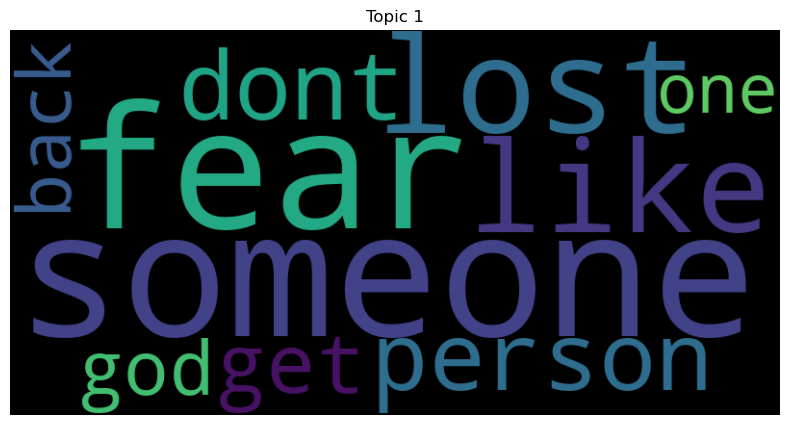

Topic 2:
want (Prob: 0.0057)
something (Prob: 0.0056)
like (Prob: 0.0056)
dont (Prob: 0.0055)
think (Prob: 0.0054)
away (Prob: 0.0053)
look (Prob: 0.0052)
back (Prob: 0.0049)
get (Prob: 0.0043)
youre (Prob: 0.0041)




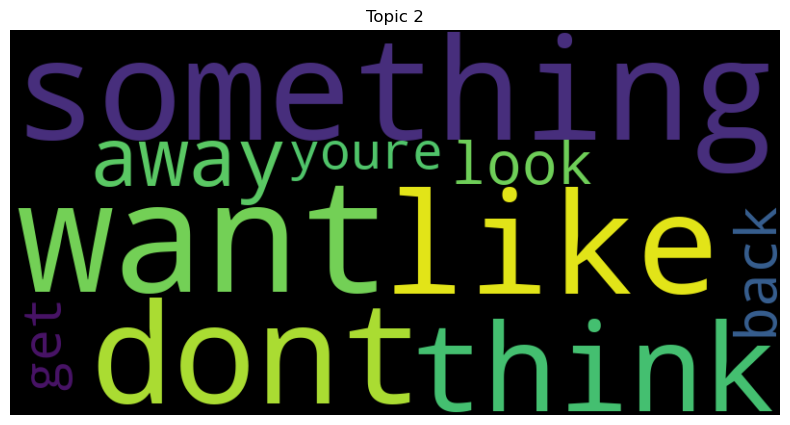

Topic 3:
lively (Prob: 0.0164)
watch (Prob: 0.0136)
amazing (Prob: 0.0114)
broadcast (Prob: 0.0075)
musically (Prob: 0.0071)
terror (Prob: 0.0056)
god (Prob: 0.0044)
news (Prob: 0.0043)
people (Prob: 0.0041)
much (Prob: 0.0037)




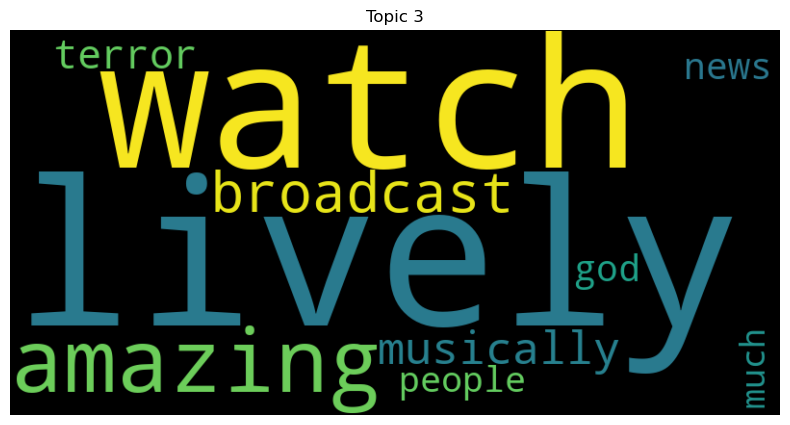

Topic 4:
amp (Prob: 0.0111)
life (Prob: 0.0064)
like (Prob: 0.0060)
get (Prob: 0.0060)
make (Prob: 0.0059)
would (Prob: 0.0050)
smiling (Prob: 0.0048)
cant (Prob: 0.0046)
theyre (Prob: 0.0042)
breezy (Prob: 0.0041)




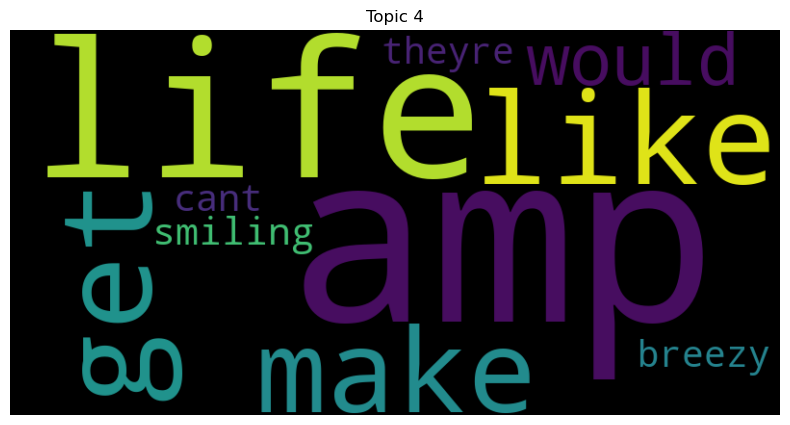

Topic 5:
start (Prob: 0.0071)
get (Prob: 0.0060)
going (Prob: 0.0058)
new (Prob: 0.0049)
think (Prob: 0.0042)
rejoice (Prob: 0.0041)
good (Prob: 0.0041)
today (Prob: 0.0040)
tired (Prob: 0.0040)
gon (Prob: 0.0039)




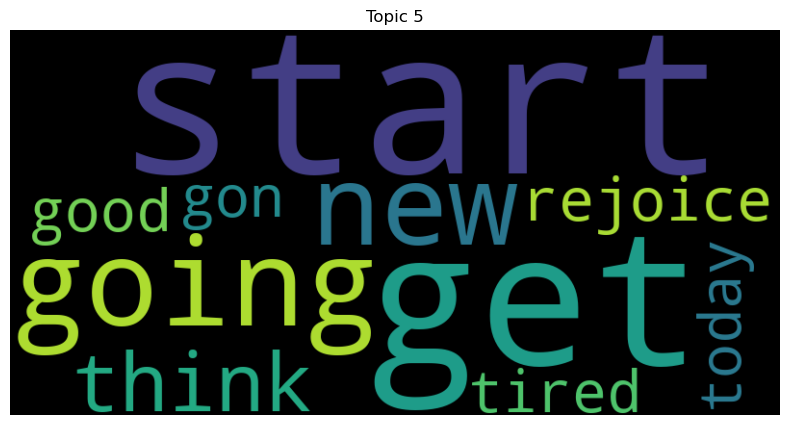

Topic 6:
dont (Prob: 0.0152)
know (Prob: 0.0116)
like (Prob: 0.0083)
people (Prob: 0.0081)
lol (Prob: 0.0060)
get (Prob: 0.0054)
black (Prob: 0.0045)
really (Prob: 0.0044)
got (Prob: 0.0044)
start (Prob: 0.0043)




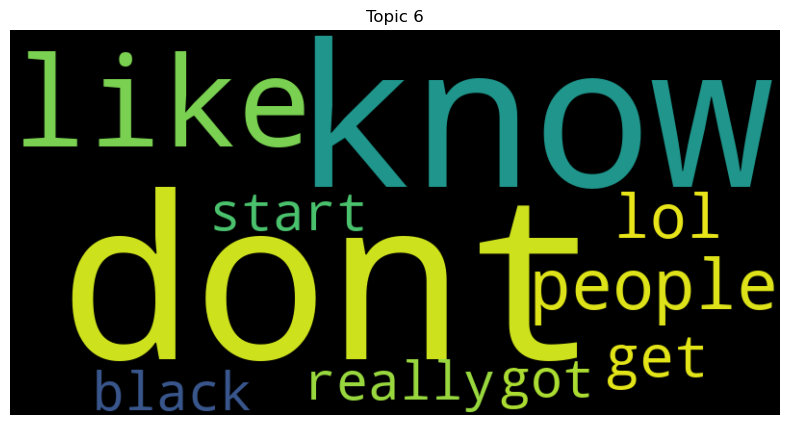

Topic 7:
like (Prob: 0.0102)
good (Prob: 0.0078)
still (Prob: 0.0068)
one (Prob: 0.0065)
bad (Prob: 0.0059)
see (Prob: 0.0053)
day (Prob: 0.0047)
everything (Prob: 0.0044)
much (Prob: 0.0041)
blues (Prob: 0.0039)




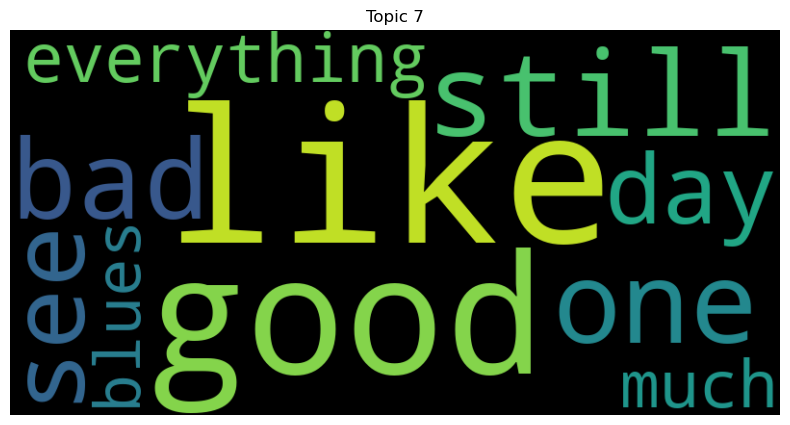

Topic 8:
happy (Prob: 0.0084)
know (Prob: 0.0075)
love (Prob: 0.0075)
like (Prob: 0.0074)
day (Prob: 0.0072)
anxiety (Prob: 0.0067)
one (Prob: 0.0067)
got (Prob: 0.0062)
panic (Prob: 0.0057)
amp (Prob: 0.0054)




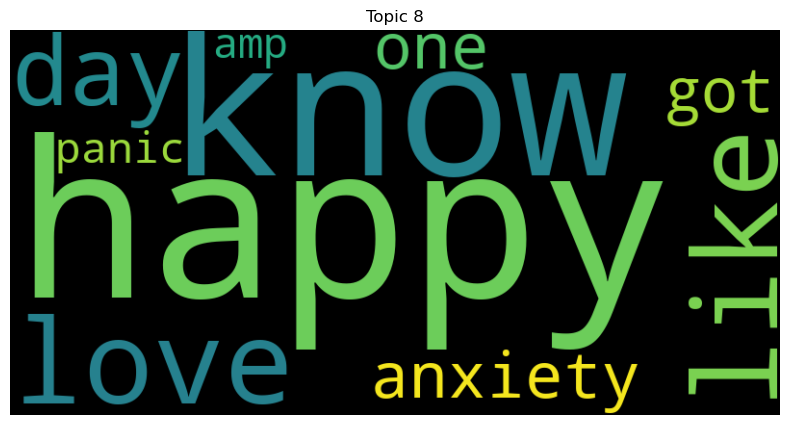

In [5]:
# Perform LDA with the optimal number of topics
lda_model = models.LdaModel(bow_corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=10)

# Visualize the topics and print top words for each topic
for topic_num in range(optimal_num_topics):
    # Get the top words for each topic
    top_words = lda_model.show_topic(topic_num, topn=10)
    # Print the top words for each topic
    print(f"Topic {topic_num + 1}:")
    for word, prob in top_words:
        print(f"{word} (Prob: {prob:.4f})")
    print("\n")

    # Generate word cloud for each topic
    wordcloud = WordCloud(width=800, height=400, colormap=cm.get_cmap('viridis')).generate_from_frequencies(dict(top_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_num + 1}")
    plt.show()
